In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
loss = 'mean_squared_error'
metrics = ['mse','mae']
batch_size=64
epochs = 50

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


model = tf.keras.models.Sequential([
    # 4 convolution layer, 2 pooling input is an 224x224 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 100 neuron fully connected hidden layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.01), 
              loss = 'mean_squared_error',
              metrics = metrics) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 179776)           

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340
...,...,...
4453,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-100.000000
4454,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
4455,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.024300
4456,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.022220


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
# median = train_df['z'].median()
# train_df['z'].fillna(median, inplace=True)
train_df = train_df.dropna()

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:
train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

In [ ]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.30,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="training",
            batch_size=32,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(224,224))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="validation",
            batch_size=32,
            seed=42,
            class_mode="other",
            target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(224,224))           

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 1737 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

Found 744 validated image filenames.
Found 620 validated image filenames.


In [ ]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

# class myCallback(tf.keras.callbacks.Callback): 
#     def on_epoch_end(self, epoch, logs={}): 
#         if(logs.get('loss') < 0.001):   
#           print("\nReached %2.2f%% loss, so stopping training!!" %(0.001*100))   
#           self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    steps_per_epoch=10,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/50
10/10 [==============================] - 232s 23s/step - loss: 81748.0156 - mse: 81748.0156 - mae: 90.5953 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.1040
Epoch 2/50
10/10 [==============================] - 198s 20s/step - loss: 0.0993 - mse: 0.0993 - mae: 0.2147 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0665
Epoch 3/50
10/10 [==============================] - 206s 21s/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0694 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0702
Epoch 4/50
10/10 [==============================] - 206s 21s/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0708 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0699
Epoch 5/50
10/10 [==============================] - 196s 20s/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0673 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0678
Epoch 6/50
10/10 [==============================] - 206s 21s/step - loss: 0.0956 - mse: 0.0956 - mae: 0.0823 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0643
Epoch 7

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,81748.015625,81748.015625,90.595268,0.013022,0.013022,0.103988,0
1,0.099308,0.099308,0.214657,0.007397,0.007397,0.066479,1
2,0.006087,0.006087,0.069409,0.007907,0.007907,0.070209,2
3,0.008645,0.008645,0.070793,0.007863,0.007863,0.069894,3
4,0.004719,0.004719,0.067318,0.007569,0.007569,0.067758,4
5,0.095579,0.095579,0.082262,0.007107,0.007107,0.064261,5
6,0.004029,0.004029,0.062124,0.006602,0.006602,0.060206,6
7,0.003329,0.003329,0.056149,0.006083,0.006083,0.055730,7
8,0.002896,0.002896,0.052022,0.005549,0.005549,0.050715,8
9,0.006037,0.006037,0.048954,0.004998,0.004998,0.044949,9


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Err [z]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()



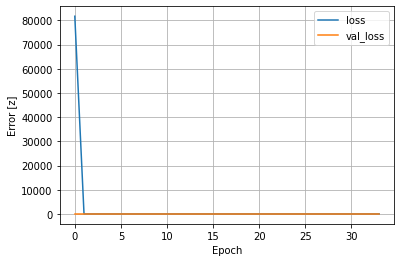

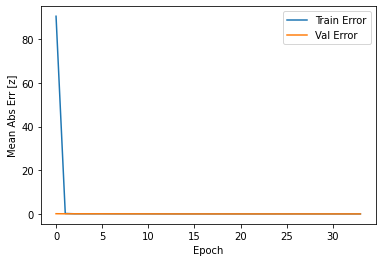

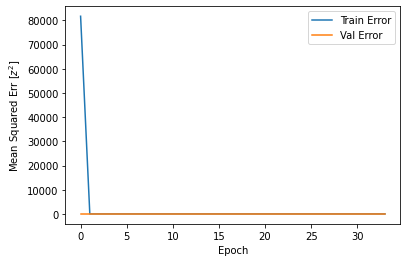

In [ ]:
plot_loss(history)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Zmodel_normal")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Zmodel_normal/assets


In [ ]:
test_features = test_df.copy()
test_labels = test_features.pop('z')

In [ ]:
test_predictions = model.predict(test_generator)


In [ ]:
test_predictions

array([[0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.024

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/normalpredictions', test_predictions)

In [ ]:
result={}

In [ ]:
result['Predicted'] = test_predictions

In [ ]:
result['z'] = np.array (test_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = result['z'], y_pred = result['Predicted'])
RMSE = MSE**(0.5)

In [ ]:
print(MSE)
print(RMSE)

0.059609204411127714
0.24414996295540925


In [ ]:
result['Predicted']=test_predictions.flatten()

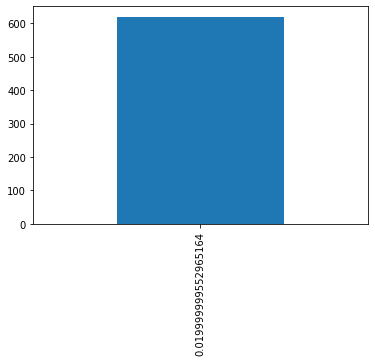

In [ ]:
fig1 = plt.gcf()
pd.value_counts(result['Predicted'].round(2)).sort_index().plot(kind="bar")

In [ ]:
test_predictions = np.load("/content/drive/MyDrive/Colab Notebooks/normalpredictions.npy")

In [ ]:
spec=test_labels.to_numpy()

In [ ]:
outlier=(spec-test_predictions)/(1+spec)

In [ ]:
outlier

array([[ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       ...,
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385]])

In [ ]:
f=pd.DataFrame(outlier)


In [ ]:
f[0].median()

0.012520852861786363